# DB Analysis
## With a few hundred papers in the DB, some experiments can be done on the data.


### 1. Connecting to the DB

In [1]:
import mariadb
import json

In [2]:
with open('../credentials.json', 'r') as crd_json_fd:
    json_text = crd_json_fd.read()
    json_obj = json.loads(json_text)

In [3]:
credentials = json_obj["Credentials"]
username = credentials["username"]
password = credentials["password"]

In [4]:
table_name = "publications"
db_name = "ubbcluj"

In [5]:
mariadb_connection = mariadb.connect(user=username, password=password, database=db_name)
mariadb_cursor = mariadb_connection.cursor()

### 2. Counting publications.

In [6]:
queryString = "SELECT COUNT(*) FROM "
queryString += table_name

In [7]:
try:
    mariadb_cursor.execute(queryString)
except Exception as ex:
    print(ex)


In [8]:
for item in mariadb_cursor:
    count = item[0]
    print("Number of publications: {0}".format(count))
    

Number of publications: 811


### 3. Distinct Affiliations

In [9]:
queryString = "SELECT Affiliations, COUNT(*) AS c FROM publications GROUP BY Affiliations ORDER BY c DESC"
try:
    mariadb_cursor.execute(queryString)
except Exception as ex:
    print(ex)

affiliations = []
for item in mariadb_cursor:
    Affiliation = item[0]
    affiliations.append(item[0])
    c = item[1]
    print("{0} : {1} occurences".format(Affiliation, c))

 : 292 occurences
Studia Universitatis "Babes-Bolyai" : 21 occurences
Studia Universitas Babes-Bolyai : 13 occurences
Studia Universitatis Babeș-Bolyai Series Informatica : 8 occurences
International Journal of Computers : 7 occurences
Proceedings of the Symposium Colocviul Academic Clujean de INFORMATICA : 6 occurences
Knowledge Engineering: Principles and Techniques : 5 occurences
Zilele Academice Clujene (ZAC) : 5 occurences
Studies in Informatics and Control : 4 occurences
Studia Universitatis Babes- : 4 occurences
The Genetic and Evolutionary Computation Conference : 3 occurences
Editura Albastră : 3 occurences
V. Niculescu : 3 occurences
Proceedings of the Symposium "Zilele Academice Clujene" : 3 occurences
organized by  “Babeş-Bolyai”  University  Cluj-Napoca : 3 occurences
International Journal on Artificial Intelligence Tools (IJAIT) : 2 occurences
Applied Soft Computing : 2 occurences
The International Journal of Information Technology and Intelligent Computing : 2 occurences

In [10]:
for i in affiliations:
    if "conference" in [k.lower() for k in i.split()]:
        print(i)

The Genetic and Evolutionary Computation Conference
MECO45 45th Conference of the Middle European Cooperation in Statistical Physics
the 2016 IEEE 12th International Conference on Intelligent Computer Communication and Processing
2008 IEEE-TTTC International Conference on Automation
The 25th International Conference on Software, Telecommunications and Computer Networks (SoftCOM)
International Conference on Next Generation Web Services Practices (NWeSP)
2nd International Conference on Intelligent Computer Communication and Processing (ICCP)
rd Balkan Conference in Informatics
The 19th International Conference on Artificial Intelligence and Soft Computing 
GECCO 2019 (Proceedings of the Genetic and Evolutionary Computation Conference Companion
KES 2019 (Proceedings of the 23rd International Conference on Knowledge-Based and Intelligent Information Engineering Systems
ICSOFT 2019 (The 14th International Conference on Software Technologies (ICSOFT 2019)
SEKE 2019 (Proc. of the 31st Interna

In [11]:
for i in affiliations:
    if "journal" in [k.lower() for k in i.split()]:
        print(i)

International Journal of Computers
International Journal on Artificial Intelligence Tools (IJAIT)
The International Journal of Information Technology and Intelligent Computing
Journal of chemical information and computer sciences 40 (4), 1052-1061
INFOCOMP Journal of Computer Science
Journal of Artificial Evolution and Applications
Journal of chemical information and computer sciences 42 (6), 1363-1369
Journal of chemical information and computer sciences 36 (3), 465-482
Journal of chemical information and computer sciences 37 (3), 510-516
Journal of chemical information and computer sciences 36 (6), 1098-1108
Journal of chemical information and computer sciences 35 (5), 851-857
International Journal of Computer Information Systems and Industrial …
International Journal of Innovative Computing Information and Control
International Journal of Innovative Computing
Journal of Systems and Software
IJCSNS International Journal of Computer Science and Network Security
IJCTA - International J

In [12]:
tokens = []
for i in affiliations:
    words = i.split()
    for word in words:
        tokens.append(word)
tokens

['Studia',
 'Universitatis',
 '"Babes-Bolyai"',
 'Studia',
 'Universitas',
 'Babes-Bolyai',
 'Studia',
 'Universitatis',
 'Babeș-Bolyai',
 'Series',
 'Informatica',
 'International',
 'Journal',
 'of',
 'Computers',
 'Proceedings',
 'of',
 'the',
 'Symposium',
 'Colocviul',
 'Academic',
 'Clujean',
 'de',
 'INFORMATICA',
 'Knowledge',
 'Engineering:',
 'Principles',
 'and',
 'Techniques',
 'Zilele',
 'Academice',
 'Clujene',
 '(ZAC)',
 'Studies',
 'in',
 'Informatics',
 'and',
 'Control',
 'Studia',
 'Universitatis',
 'Babes-',
 'The',
 'Genetic',
 'and',
 'Evolutionary',
 'Computation',
 'Conference',
 'Editura',
 'Albastră',
 'V.',
 'Niculescu',
 'Proceedings',
 'of',
 'the',
 'Symposium',
 '"Zilele',
 'Academice',
 'Clujene"',
 'organized',
 'by',
 '“Babeş-Bolyai”',
 'University',
 'Cluj-Napoca',
 'International',
 'Journal',
 'on',
 'Artificial',
 'Intelligence',
 'Tools',
 '(IJAIT)',
 'Applied',
 'Soft',
 'Computing',
 'The',
 'International',
 'Journal',
 'of',
 'Information',
 '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tbodi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


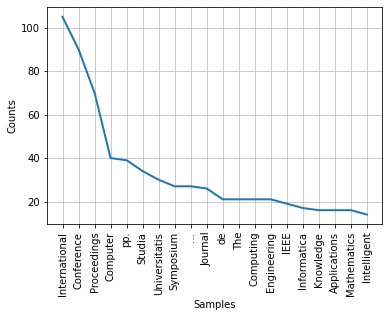

In [13]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    #print(str(key) + ':' + str(val))
    pass
freq.plot(20, cumulative=False)

### 3. TF-IDF and K-Means?


### 3. Distinct Affiliations

In [14]:
queryString = "SELECT Title FROM publications"
try:
    mariadb_cursor.execute(queryString)
except Exception as ex:
    print(ex)

titles = []
for item in mariadb_cursor:
    Title = item[0]
    titles.append(item[0])

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
corpus = titles[:]
corpus

['A Comparative Study of Software Architectures in Mobile Applications',
 'The Use of Simple Cellular Automata in Image Processing',
 'Support Vector Machine and Boosting based Multiclass Classification for Traffic Scene Obstacles',
 'Obstacle Recognition in Traffic by Adapting the HOG Descriptor and Learning in Layers',
 'Descriptors fusion and genetic programming for breast cancer detection',
 'Multi-objective breast cancer classification by using Multi-Expression Programming',
 'Pedestrian Recognition by Using Kernel Descriptors',
 'Improving classification performance of Support Vector Machine by genetically optimisation of kernel shape and hyper-parameters',
 'How the Kernels Can Influence Image Classification Performance',
 'Alignment of Custom Standards by Machine Learning Algorithms',
 'Model Alignment by Using the Concept Definition',
 'Evolutionary design of Evolutionary Algorithms',
 'Genetic Programming with linear representation – a survey',
 'An autonomous GP-based system

In [17]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [18]:
print(vectorizer.get_feature_names())

['00447', '09', '10', '101', '105', '10th', '110', '11th', '12', '120', '125', '128', '13', '131', '15', '1582', '15th', '163', '16th', '17th', '183', '187', '18th', '195', '1985', '1994', '1996', '1999', '19th', '2001', '2002', '2003', '2004', '2005', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2017', '2018', '2019', '2020', '2066', '207', '20th', '217', '222', '23th', '24', '253', '254', '257', '264', '27', '273', '27th', '2d', '2nd', '34', '35', '38', '3d', '42', '456', '465', '4711', '485', '486', '4th', '5329', '5597', '5768', '76', '775', '782', '80', '88', '89', '8th', '91', '93', '95', 'abordare', 'abordari', 'about', 'abs', 'abstract', 'abstractness', 'academic', 'academice', 'academiceclujene', 'accelerate', 'acceleration', 'accelerometer', 'access', 'accessibility', 'according', 'accurate', 'acivs', 'acknowledgement', 'acm', 'aco', 'acquired', 'acrylonitrile', 'acta', 'action', 'active', 'activitatii', 'activities', 'activity', 'actuala', 'adapta

In [19]:
print(X.shape)

(811, 1752)


In [20]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
for k in X.toarray():
    for j in k:
        if j > 1:
            print(j)

2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
2
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2


In [22]:
import pandas as pd

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(use_idf=False, norm='l1')
matrix = vec.fit_transform(corpus)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

,00447,09,10,101,105,10th,110,11th,12,120,...,xml,year,your,zilele,zsuzsanna,évolutive,în,şabloanele,şi,ştiinţifice
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

vec = CountVectorizer(tokenizer=textblob_tokenizer)
matrix = vec.fit_transform(corpus)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tbodi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,'inteligenta,09,1,10,10th,11th,12-13,120-131,125-128,13-15,...,évolut,în,şi,ştiinţific,β-x,–,’,“,”,…
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      use_idf=True)
matrix = vec.fit_transform(corpus)
df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())


c:\users\tbodi\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv

In [26]:
for word in df.columns:
    for row in df[word]:
        if row != 0.0:
            print(word, row)

'inteligenta 0.3841833114932447
09 0.3660449585201951
1 0.47577769799236364
1 0.2568208284689851
1 0.2666958726271492
1 0.26433951410256024
1 0.25052248414867945
10 0.5179911422097674
10 0.5983085324679426
10th 0.3138648479381621
10th 0.5843153457608641
11th 0.28568156816461326
11th 0.4235864828976809
12-13 0.44960563937199866
120-131 0.4269971991013631
125-128 0.3273506765967657
13-15 0.5078306650672876
1582-5329 0.3146269842134896
1582-5329 0.32101252516393003
15th 0.2724974196008289
15th 0.2582539758169417
15th 0.3601253426409047
15th 0.37757604998268435
163-187 0.4002323802626325
16th 0.28325413730725285
16th 0.39770325144030816
17th 0.3218138794597125
17th 0.44196117762112014
183-195 0.3121486716145518
18th 0.3572947666620626
1985–1996 0.30043789881701105
1994.an 0.4153780012195729
1999 0.2747710568947379
1999-molecular 0.2747710568947379
19th 0.23712722273287337
19th 0.4220857950811319
2 0.29408429604013975
2 0.36066416003040985
2-4 0.34214828429900984
2001 0.4440695319228558
200

asynchron 0.5868821181353644
asynchron 0.3941354150145173
asynchron 0.431437508694799
asynchron 0.39427745869946174
asynchron 0.5187434596865481
asynchron 0.47765763113314946
atrial 0.34040493540914035
attractor 0.3708099427623541
attractor 0.42427786755504004
attribut 0.4870739644825449
attribut 0.4390396478837475
attribut 0.3417269070173619
au 0.33241179534913834
author 0.5632405080232836
auto-adapt 0.369540345333579
autoencod 0.32778060496661887
autoencod 0.45009033592007724
automat 0.23642943380915465
automat 0.5003700491709877
automat 0.4212128071229812
automat 0.3530488248818613
automat 0.4554365141054771
automat 0.380858330127154
automat 0.39617312949723343
automat 0.4929520381641953
automat 0.4034630885229152
automat 0.47398048822490035
automat 0.43006251671896734
automat 0.3352616438176795
automat 0.35815358292561084
automat 0.24459061029133328
automat 0.29293922963325064
automat 0.3762734437016719
automata 0.370734552056696
automata 0.40400969667592984
automata 0.326181742725

comput 0.32650245051199106
comput 0.21563192635395947
comput 0.27192277387392133
comput 0.2239510499850299
comput 0.2376725325326953
comput 0.2273806959820726
comput 0.15901337620312359
comput 0.1552976009325963
comput 0.15666487190054873
comput 0.1612689649999447
comput 0.15915687690999564
comput 0.1617309387409228
comput 0.18217575267608002
comput 0.15329565186814392
comput 0.1661800016599141
comput 0.16986200773825186
comput 0.32092696088689276
comput 0.20828054258837145
comput 0.2175793226674033
comput 0.19640348483288728
comput 0.334186830391783
comput 0.2344022963355487
comput 0.17070777499002263
comput 0.20556564604542438
comput 0.21523491151513474
comput 0.31622839714362055
comput 0.2853338407829964
comput 0.23184318147377211
comput 0.23184318147377211
comput 0.23184318147377211
comput 0.25977936889048286
comput 0.26636287050818597
comput 0.30190296887775153
comput 0.4324121735381192
comput 0.4324121735381192
comunicări 0.3779644730092272
concept 0.5051781985728996
concept 0.29

develop 0.4402388036185513
devic 0.4885366220305648
dezvoltar 0.40434987343606416
dezvoltarea 0.2656079619497943
dezvoltarea 0.4676171691852436
dfe 0.5681633786833855
dfe 0.44485438926482096
dfx 0.47327594845084164
diagnosi 0.42515967566099316
diagnosi 0.49577504802852707
diagnosi 0.36290915760174225
diagnosi 0.3725206772746956
diagnosi 0.34576040774123823
diagnosi 0.3593576508927981
diagnosi 0.3918735579665733
didactica 0.5
differ 0.34791480469728664
digit 0.45809172582628865
din 0.31085021544727903
direcţii 0.48695426833768957
dirijar 0.3841833114932447
disast 0.5950962965540627
disclosur 0.39670882212542397
discov 0.33939415246578153
discov 0.45202935103293546
discov 0.35714616178170916
discoveri 0.5589919741716977
discoveri 0.5274732615514367
discoveri 0.4347873610080847
discrimin 0.4210138496775902
discrimin 0.5971614221198183
discrimin 0.31688519624991346
discrimin 0.31688519624991346
diseas 0.4563278821572087
diseas 0.4948169444981536
dispozitivelor 0.31085021544727903
distanc 0

fulli 0.3630273564433972
fulli 0.36100675339298016
fuml 0.6113086253758278
fuml 0.41759000080650965
fuml 0.3599123207154921
fuml 0.2523217054419933
fuml 0.30963392476101087
fuml 0.3280551134707379
function 0.469700921675774
function 0.45067058395281717
function 0.4474239230139231
function 0.26825310401853514
function 0.5160076341171308
function 0.3889018262291903
function 0.3733963789459221
function 0.3519169573497153
fundament 0.8837757398547
fundament 0.8837757398547
fusion 0.45726976976729655
fusion 0.48059639405970245
futur 0.3099960593081127
futur 0.4297853700063
fuzzi 0.16327629583352515
fuzzi 0.1473961871433615
fuzzi 0.4327512999888072
fuzzi 0.3726984346696747
fuzzi 0.3167020483985636
fuzzi 0.24591195185673037
fuzzi 0.19195874160825965
fuzzi 0.23328098344413278
fuzzi 0.33925518854591835
fuzzi 0.29879987643557765
fuzzi 0.3129910953421293
fuzzi 0.2955789097868127
fuzzi 0.28327189329003477
fuzzi 0.2100260911707054
fuzzi 0.285464297001719
fuzzi 0.22848009321884527
fuzzi 0.3043077340

iwsm-mensura 0.396358387061324
j 0.5484205334183826
j 0.27686346203466755
j 0.281267417598881
j.a 0.3620662340349712
java 0.38329477190650824
java 0.41440832318254917
java 0.38062174507449453
java 0.2670020602973197
java 0.249103321304087
java 0.2805930974368406
java 0.33842348950775647
java 0.5101121606653866
javascript 0.6979261300010885
jhotdraw 0.48502542398255244
join 0.3299276176602536
join 0.5211379406922638
joint 0.4590908897679199
joint 0.4707254765650494
joint 0.5335331408249536
journal 0.2710812386210721
journal 0.34615364267934573
journal 0.2791762188381273
journal 0.39903655835106183
juli 0.32234779923607776
juli 0.4235864828976809
julien 0.30065326125988273
k-mean 0.4863317813791195
kadan 0.4153629044289665
kept 0.3082991315096916
kept 0.42547763489167906
kept 0.42290896191895494
kept2009 0.3540985137125575
kept2013 0.47219219228067205
kernel 0.45609522126152213
kernel 0.30118071369288435
kernel 0.45407822550838595
kernel 0.4607068375102607
kernel 0.7108056930024669
kerne

multiag 0.4669942095957264
multiag 0.4261712414815418
multiag 0.3736871875215928
multiag 0.49389862141936025
multiag 0.43036999275278526
multiclass 0.3667119528460069
multiclass 0.42821754870757905
multidimension 0.5211246156293713
multifacet 0.3831818972751949
multimedia 0.4596086574252073
multimedia 0.5022827343461155
multimedia 0.3766490647936015
multimedia 0.3624964494429733
multimedia 0.444372745283497
multimedia 0.45135975333243433
multimod 0.5309367848293681
multimod 0.3262465738522174
multimod 0.49085525852789824
multiparadigm 0.31349648373243083
multipl 0.33169319267940817
multipl 0.4558836883733624
multipl 0.46193185309168805
multipl 0.47698437694034157
multipl 0.30767114802952145
multipl 0.45781664202274464
multivari 0.2921338547129366
multivari 0.4622677179892088
museum 0.5379649825274259
mutat 0.38325806233591064
mvc 0.582741811725471
n 0.5416120452047675
nation 0.5104022374029293
national 0.28192315471874224
natur 0.4123755303909381
natur 0.3667668133017046
natur 0.238787

powerlist-bas 0.3211801531026399
practic 0.35789706488076894
practic 0.4415990052624314
practic 0.2869452165254754
predict 0.35491870238387335
predict 0.3459554361290038
predict 0.2505032349425042
predict 0.35972227666638845
predict 0.41946905880465657
predict 0.3939140675405637
predict 0.35603865043194044
predict 0.34476214775849295
predict 0.6002133629839806
predict 0.32268878740267753
predict 0.3438206067973199
predict 0.39866143005035487
predict 0.37312341654433734
predict 0.35234911928598933
predict 0.3394463767284748
predict 0.304943896932667
predict 0.3725171665303252
predict 0.2457265742052054
prefer 0.49757410840934146
preliminari 0.5198993864134202
preliminari 0.4061035348518441
presa 0.5773502691896257
present 0.3290378283428153
press 0.40316852522152274
prevent 0.37169784230554637
prevent 0.38025967700612723
prevent 0.39399896858632244
prin 0.320313046003298
prin 0.35558924216085486
princip 0.4934368874344385
princip 0.22272282523447187
princip 0.2900590177265729
princip 0.

search-bas 0.3144228781419991
second 0.3828182598267822
secondari 0.5375893696385912
secur 0.5118290189999205
secur 0.30840654482777374
seed 0.6799528416375084
segment 0.2846378368574721
segment 0.2494630881153488
segment 0.291445581042038
segment 0.36066623976959444
segment 0.28238359069757596
segment 0.4162591794972735
segment 0.3674557191756164
segment 0.43751017540063614
segment 0.3522372401619317
segment 0.39078918893762854
segment 0.34932495290295773
segment 0.18445121398969033
select 0.3433820476633763
select 0.3619809015129837
select 0.25670327754668526
select 0.502147709123291
select 0.3702238912623533
select 0.41213951079517724
select 0.4666418844920409
select 0.3795417702488904
select 0.31654883247196997
select 0.2225595335502661
select 0.3811303940156483
select 0.24899766108465823
select 0.34465125434479443
select 0.3801554244167508
select 0.32594168093317566
select 0.3099535007861918
select 0.29189297811725284
select 0.2815789332707843
select 0.2478270490718133
select 0.48

twitter 0.555506697537484
type 0.34815465256905304
type 0.3521391338675863
ubiquit 0.4661386095889635
uml 0.41759000080650965
uml 0.4191056829406192
uml 0.3754448128540919
uml 0.2765392838255099
uml 0.250119602709901
uml 0.3280551134707379
unbound 0.3831208390265992
uncov 0.5207661600834653
une 0.36395491817752007
une 0.3309925287159731
une 0.33298126207924883
unifi 0.6076260152501889
uniform 0.43015854698920725
univers 0.45036294744384425
univers 0.30167929161887885
univers 0.37602704980172824
univers 0.3311434453475197
univers 0.33995077325799755
universitara 0.5773502691896257
universitati 0.27424108939682945
universitati 0.2798069746975276
universitati 0.32556268049660636
universitati 0.3163240211197032
universitati 0.34096318823531996
universitati 0.3679489840179037
unsupervis 0.40414940788265274
unsupervis 0.3164287321405786
unsupervis 0.3862685684377328
unsupervis 0.45614280960705617
unsupervis 0.47087040847629175
unsupervis 0.4128770208906373
unui 0.28192315471874224
updat 0.47

In [27]:
from sklearn.cluster import KMeans

In [28]:
number_of_clusters = 10

In [29]:
km = KMeans(n_clusters=number_of_clusters)
km.fit(matrix)

KMeans(n_clusters=10)

In [30]:
km.fit

<bound method KMeans.fit of KMeans(n_clusters=10)>

In [31]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: evolutionari problem model optim complex
Cluster 1: use program algorithm comput problem
Cluster 2: data intellig support machin mobil
Cluster 3: softwar object orient databas evalu
Cluster 4: cellular automata imag evolv edg
Cluster 5: aspect base cluster techniqu evalu
Cluster 6: cluster fuzzi softwar use hierarch
Cluster 7: manag web distribut knowledg design
Cluster 8: classif chemic element fuzzi problem
Cluster 9: v parallel niculescu program powerlist


In [32]:
results = pd.DataFrame({
    'corpus': corpus,
    'category': km.labels_
})

In [33]:
results.sort_values('category')
for k in results.sort_values('category').values:
    print(k[1], " --- ", k[0])

0  ---  A parallel evolutionary approach to community detection in complex networks
0  ---  Search-Based Software Entity Refactoring – A New Solution Representation For The Multi-Objective Evolutionary Approach Of The Entity Set Selection Refactoring Problem
0  ---  Evolving Evolutionary Algorithms using Evolutionary Algorithms
0  ---  Recombination Operators in Permutation-Based Evolutionary Algorithms for the Travelling Salesman Problem.
0  ---  Evolutionary algorithms for the component selection problem
0  ---  Observing the swarm behaviour during its evolutionary design
0  ---  Collaborative Evolutionary Algorithms for detecting Overlapping Communities in Complex Networks,
0  ---  Simplified Chain Folding Models as Metaheuristic Benchmark for Tuning Real Protein Folding Algorithms?
0  ---  Game theory and extremal optimization for community detection in complex dynamic networks
0  ---  Urban bicycles renting systems: Modelling and optimization using nature-inspired search methods
0

1  ---  SPECTROPHOTOMETRIC CHARACTERIZATION OF ROUMANIAN MEDICINAL HERBS ASSISTED BY ROBUST CHEMOMETRICS EXPERTISE
1  ---  Desired employment/Occupational field
1  ---  Appraisal of indoor lighting systems quality
1  ---  Papers from the 1999 Symposium on Mathematical Chemistry, Duluth, MN, May 1999-MOLECULAR MODELING-Structural Analysis of Transition Metal bX Substituent Interactions. Toward …
1  ---  Desired employment Occupational field
1  ---  Programming Fundamentals
1  ---  Object-oriented logic programming
1  ---  Residential Energy Efficient Lighting
1  ---  Metode de recunoastere a formelor bazate pe agenti
1  ---  A Programming Interface For Finding Relational Association Rules
1  ---  ComDeValCo Development Tools for Procedural Paradigm
1  ---  Applications of principal components methods
1  ---  Incremental Refactoring Using Seeds
1  ---  Lighting quality-component of indoor environment
1  ---  Stereomatching using radiometric invariant measures
1  ---  AN AGENT BASED APPRO

3  ---  An aggregated coupling measure for the analysis of object-oriented software systems
3  ---  A Computer Vision Approach to Object Tracking and Counting
3  ---  Hierarchical clustering in large object datasets – a study on complexity, quality and scalability
3  ---  Introducing Open-Closed Principle In Object Oriented Design Via Refactorings
3  ---  Incremental Horizontal Fragmentation: A new Approach in the Design of Distributed Object Oriented Databases
3  ---  A Comparative Study of Software Architectures in Mobile Applications
3  ---  On Evaluating Software Systems Design
3  ---  A New Mechanism for Fast Delivery of Proxy Cache Objects,
3  ---  A study of dependence of software attributes using data analysis techniques
3  ---  mMVC - an Architecture Design Pattern for Mobile Applications
3  ---  An Agile MDA Approach for Service Oriented Components
3  ---  A Comparative Study on the Influence of Similarity Measures in Hierarchical Clustering in Complex Distributed Object-Orie

In [34]:
### GENSIM

In [35]:
from gensim.models import word2vec
from gensim.test.utils import common_texts, get_tmpfile

In [36]:
tokenized_sentences = [[j.lower() for j in st.split() if j not in stopwords.words('english')] for st in corpus]

In [37]:
model = word2vec.Word2Vec(tokenized_sentences, min_count=1)

In [38]:
model.save("word2vec.model")

In [39]:
#model = word2vec.load("word2vec.model")

In [40]:
model

In [41]:
model.wv["study"]

array([-9.5008807e-05,  4.7409027e-03, -1.0618706e-03, -5.2929926e-03,
       -6.2699633e-04, -3.1279637e-03,  4.5252931e-03, -8.6415518e-04,
        4.6750237e-03,  6.4488669e-04, -4.5280242e-03,  6.3817127e-04,
       -2.7529527e-03, -4.0575224e-03, -3.6045490e-03, -2.9608570e-03,
       -5.1165903e-03,  2.4518231e-04,  6.1473101e-03,  1.8005320e-03,
       -1.8271204e-04, -1.6901032e-03, -2.3287118e-03, -5.9766881e-04,
       -2.4256576e-03, -1.7813146e-03,  2.8343203e-03, -3.2264629e-04,
       -4.0037227e-03, -4.2376947e-04, -4.4731591e-03, -1.9378687e-03,
        4.3057594e-03,  5.6681265e-03, -1.3025438e-03, -1.0684358e-03,
       -3.5630136e-03,  3.3643909e-03, -3.1596813e-03, -2.4297438e-03,
       -5.3394865e-03, -1.4462558e-03,  4.3881843e-03,  3.4122909e-03,
       -3.8824067e-03,  3.1191423e-03,  5.1341060e-04, -8.1784150e-04,
       -3.1348311e-03,  3.2250194e-03,  1.5659159e-03,  2.1508324e-03,
        2.5775761e-03, -2.8976868e-03,  4.0679337e-03, -3.6815789e-03,
      

In [42]:
words = list(model.wv.vocab)

In [43]:
print(words)

['a', 'comparative', 'study', 'software', 'architectures', 'mobile', 'applications', 'the', 'use', 'simple', 'cellular', 'automata', 'image', 'processing', 'support', 'vector', 'machine', 'boosting', 'based', 'multiclass', 'classification', 'traffic', 'scene', 'obstacles', 'obstacle', 'recognition', 'adapting', 'hog', 'descriptor', 'learning', 'layers', 'descriptors', 'fusion', 'genetic', 'programming', 'breast', 'cancer', 'detection', 'multi-objective', 'using', 'multi-expression', 'pedestrian', 'kernel', 'improving', 'performance', 'genetically', 'optimisation', 'shape', 'hyper-parameters', 'how', 'kernels', 'can', 'influence', 'alignment', 'custom', 'standards', 'algorithms', 'model', 'concept', 'definition', 'evolutionary', 'design', 'linear', 'representation', '–', 'survey', 'an', 'autonomous', 'gp-based', 'system', 'regression', 'problems', 'what', 'else', 'evolution', 'pso', 'telling', 'us?', 'coalition', 'formation', 'full', 'connected', 'scale', 'free', 'networks', 'functions'

In [44]:
X = model[model.wv.vocab]

c:\users\tbodi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [45]:
df = pd.DataFrame(df)

In [46]:
df.shape

(811, 1477)

In [47]:
df.head()

,'inteligenta,09,1,10,10th,11th,12-13,120-131,125-128,13-15,...,évolut,în,şi,ştiinţific,β-x,–,’,“,”,…
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
import numpy as np

In [49]:
import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word in model.wv.vocab:
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in model[word]]) + "\n")
    
out_v.close()
out_m.close()

c:\users\tbodi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
